In [1]:
import random
import textwrap
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from math import log
from math import exp
import math

In [2]:
def wiener(n, dt, t_init=0, w_init=0.0):
    """Returns one realization of a Wiener process with n steps of length dt.
    The time and Wiener series can be initialized using t_init and w_init respectively."""
    n+=1
    t_series = np.arange(t_init,n*dt,dt)
    h = t_series[1]-t_series[0]
    z = np.random.normal(0.0,1.0,n)
    dw = np.sqrt(h)*z
    dw[0] = w_init
    w_series = dw.cumsum()
    return t_series, w_series

#Contents
+ ###[`Model Of Speculative Financial Bubbles`](#modelS)<a href='#modelS'></a>
    + Replicates a model presented by Didier Sornette anticipating crises in the financial markets.
      + [**Analysis Summary:**](#modelS_ana)<a href='#modelS_ana'></a>
       + [section 1](#modelS_sec1)<a href='#modelS_sec1'></a>

<a id=modelS></a>
---
#Model Of Speculative Financial Bubbles
Didier Sornette and his Financial Crisis Observatory have plotted a set of early warning signs for unstable systems exhibitting super exponential growth. They claim to be able to track the moment when instability will cause unexpected crashes. His work was outlined in a presentation describing his work in a [2013 TED talk](http://www.ted.com/talks/didier_sornette_how_we_can_predict_the_next_financial_crisis#t-637034). More specifically though, the work presented here references a [2008 paper on speculative bubbles](http://arxiv.org/pdf/cond-mat/0104341v2.pdf) which he published.

In [3]:
def num_retrace(series, x, dt, u0, s0, p0, m, p_init=0.5):
    if series == 'w':
        t=0
        alph = 1./(m-1)
        p_t = p_init
        p_last = p_init
        tc = (1./p_init**(m-1))*alph/u0
        w_series = x
        p_series = []
        for i in range(len(w_series)):
            p_t = (alph/(u0*(tc-t)-s0/p0*w_series[i]))**alph
            vari = s0*p_t**(m-1)/p0 #variance
            mean = (m/2/p_t*vari**2+u0/p0**m*p_t**(m-1)) #mean
            skew = u0*(tc-t) #skew
            dj = dt*mean/skew
            if random.random()<=dj:
                #print 'crash at', i*dt
                p_t = p_t*(1-abs(random.gauss(0,0.01)))
                t=tc-(alph/p_t**(1./alph)+s0/p0*w_series[i])/u0
            p_series.append(p_t)
            p_last = p_t
            t += dt
        return p_series

expect crash at approx 20.0


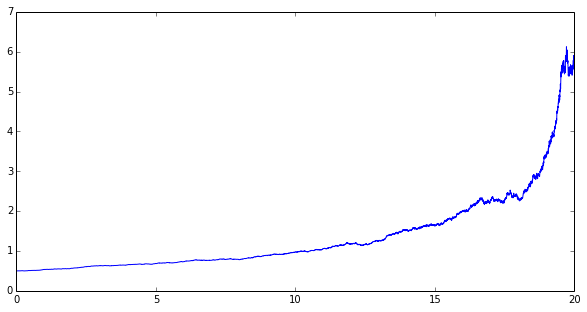

In [4]:
n=10000
dt=2e-3
T,W = wiener(n,dt)

m=2
u0=0.1
s0=np.sqrt(dt)
p0=1
P = num_retrace('w',W,dt,u0,s0,p0,m)
p_init=0.5

alph = 1./(m-1)
tc = (1./p_init**(m-1))*alph/u0
print 'expect crash at approx', tc

plt.figure(figsize=(10,5))
plt.plot(T,P)
plt.show()

In [7]:
collection=[]
for i in range(500):
    n=3000
    dt=2e-3
    T,W = wiener(n,dt)

    m=2
    u0=0.2
    s0=np.sqrt(dt)
    p0=1
    collection.append(np.array(num_retrace('w',W,dt,u0,s0,p0,m)))

avg_path = [np.average(p) for p in zip(*collection)]

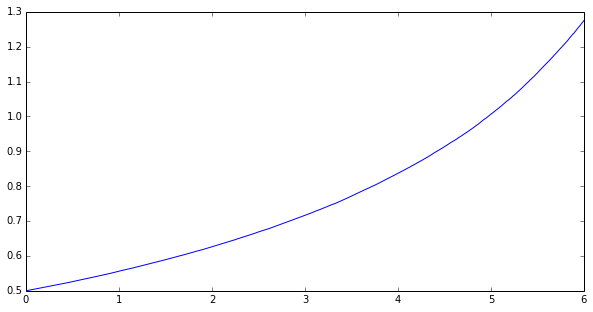

In [8]:
plt.figure(figsize=(10,5))
plt.plot(T,avg_path)